<a href="https://colab.research.google.com/github/JuanCarlosSantiagoCulebras/GANs-Pix2Pix/blob/main/GANs_Pix2Pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES GENERATIVAS ADVERSARIAS (GANs) / Pix2Pix




Tutorial Youtube: Dot CSV Generando FLORES realistas con IA - Pix2Pix | IA NOTEBOOK #5

*   https://www.youtube.com/watch?v=YsrMGcgfETY&t=4202s

Tutorial pix to pix https://www.tensorflow.org/tutorials/generative/pix2pix
Paper https://phillipi.github.io/pix2pix/
Imagenes http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html

Imagenes Monet: 

https://www.kaggle.com/shcsteven/paired-landscape-and-monetstylised-image


In [ ]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Version info.
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [ ]:
!pip install -U tensorboard

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.4.0)


# CARGA DE DATOS Y PREPROCESAMIENTO

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("tensorflow version")
print (tf.version)

# RUTAS ARCHIVOS GOOGLE DRIVE
PATH = '/content/drive/My Drive/DatosAux'
INPATH = PATH + '/input'
OUPATH = PATH + '/target'
CKPATH = PATH + '/checkpoints'
LOGPATH = PATH + '/logs'
OUTGENPATH = PATH + '/output'
MODELPATH = PATH + '/model'

# Ejecución comando de consola (lista de nombres de archivos)
imgurls = !ls -1 "{INPATH}"

In [ ]:
print(len(imgurls))
imgurls[0:4]

530


['image100.png', 'image101.png', 'image102.png', 'image103.png']

In [ ]:

#DESORDENAMOS DATASET

n = len(imgurls)
train_n = round(n * 0.80) 

# Listado randomizado
randurls = np.copy(imgurls)

#np.random.seed(23)
np.random.shuffle(randurls)

# PARTICIONAMOS DATASET
tr_urls = randurls[:train_n]
ts_urls = randurls[train_n:n]

print(len(imgurls), len(tr_urls), len(ts_urls))


530 424 106


In [ ]:
# Definimos funciones de transformación de las imagenes
# UTILIZAMOS TENSORFLOW PARA PREPROCESAR LAS IMAGENES

IMG_WIDTH = 256
IMG_HEIGHT = 256

# Reescalar imagenes
def resize(inimg, tgimg, heigth, width):
  inimg = tf.image.resize(inimg, [heigth, width])
  tgimg = tf.image.resize(tgimg, [heigth, width])

  return inimg, tgimg

# Normalizar (0..256 a -1..1)
def normalize(inimg, tgimg):
  inimg = (inimg/127) - 1
  tgimg = (tgimg/127) - 1

  return inimg, tgimg

# Aumentación de datos : Random Crop + Flip
#   Desplazamiento aleatorio
#   Voltear imagen
def random_jitter(inimg, tgimg):
  
  # En fluctuación aleatoria, la imagen cambia de tamaño a 286 x 286 y luego se recorta aleatoriamente a 256 x 256
  inimg, tgimg = resize(inimg, tgimg, 286, 286)

  #Apilamos las dos imagenes para realizar las mismas trasformaciones
  stacked_image = tf.stack([inimg, tgimg], axis=0)
  cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_WIDTH, IMG_HEIGHT, 3]) #2 IMAGENES 3 CANALES DE COLOR

  inimg, tgimg = cropped_image[0], cropped_image[1]

  # Volteamos la imagen de forma aleatoria 
  if tf.random.uniform(())> 0.5:
    inimg = tf.image.flip_left_right(inimg)
    tgimg = tf.image.flip_left_right(tgimg)

  return inimg, tgimg

# carga de imagenes
def load_image(filename, augment=True):
  inimg = tf.cast(tf.image.decode_png(tf.io.read_file(INPATH + '/' +filename)), tf.float32)[..., :3] #3 limita canales de entrada a RGB
  tgimg = tf.cast(tf.image.decode_png(tf.io.read_file(OUPATH + '/' +filename)), tf.float32)[..., :3]

  inimg, tgimg = resize(inimg, tgimg, IMG_WIDTH, IMG_HEIGHT)

  if augment:
    inimg, tgimg = random_jitter(inimg, tgimg)
  
  inimg, tgimg = normalize(inimg, tgimg)
  
  return inimg, tgimg
  

def load_train_image(filename):
    return load_image(filename,True)

def load_test_image(filename):
    return load_image(filename,False)




In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(tr_urls)
train_dataset = train_dataset.map(load_train_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(1) # tamaño de lote especificado en el paper

test_dataset = tf.data.Dataset.from_tensor_slices(ts_urls)
test_dataset = test_dataset.map(load_test_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = train_dataset.batch(1) # tamaño de lote especificado en el paper


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


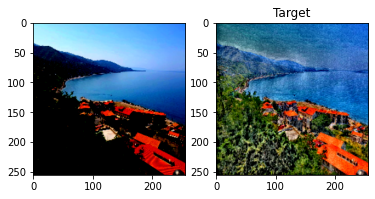

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


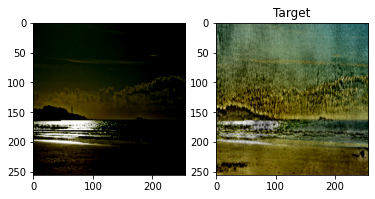

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


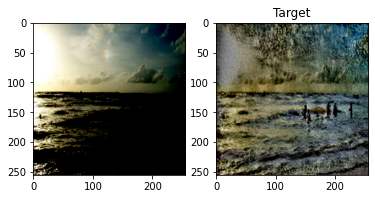

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


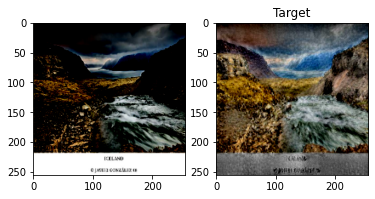

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


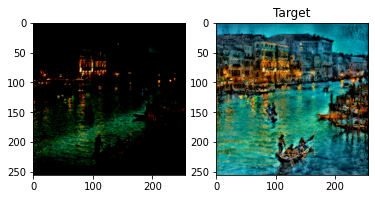

In [ ]:
# PRUEBA DE CARGA
for inimg, tgimg in train_dataset.take(5):
  #print(inimg.shape)
  plt.title('Input')
  plt.subplot(1,2,1)
  plt.imshow(inimg[0,...]) # devuelve el lote => eliminamos primera dimensión resto igual
  plt.subplot(1,2,2)
  plt.title('Target')
  plt.imshow(tgimg[0,...]) # devuelve el lote => eliminamos primera dimensión resto igual
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


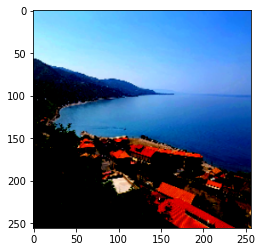

In [ ]:
t,  = train_dataset.take(1)
inp = t[0].numpy()
inp = inp[0,...]
plt.imshow(inp) 
plt.show()

# DISEÑO DE LA ARQUITECTURA DE LA  RED

SE SIGUE DISEÑO DEL PAPER

La red tiene dos partes
*   Generador de imagenes
*   Discriminador


##Generador de imagenes

  * La arquitectura del generador es una U-Net modificada.
  * Cada bloque en el codificador es (Conv -> Batchnorm -> Leaky ReLU)
  * Cada bloque en el decodificador es (Transposed Conv -> Batchnorm -> Dropout (aplicado a los primeros 3 bloques) -> ReLU)
  * Hay conexiones de salto entre el codificador y el descodificador (como en U-Net).

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

 
# Las capas del generador en el encoder Ck estan formadas por tres partes: 
#    Convolution (Conv2D) - Batch Normalization - LeakyReLU
#     * en la primare no se aplica BatchNorm
#    k indica el número de filtros
# Al realizar esta operación en el encoder se esta realizando 
# una compresión de la imagen (downsample)
def downsample(filters, apply_batchnorm=True):
  result = keras.Sequential()

  initializer = tf.random_normal_initializer(0,0.02)

  # Capa convolucional
  result.add(layers.Conv2D(filters,
                    kernel_size=4,
                    strides=2,
                    padding="same",
                    kernel_initializer=initializer,
                    use_bias=not apply_batchnorm)) # al aplicar BatchNormalization ya tiene implicito el sesgo

  # Capa Batch Normalization
  if apply_batchnorm:
    result.add(layers.BatchNormalization())

  # Capa de activación
  result.add(layers.LeakyReLU())

  return result



In [ ]:

down_model = downsample(3)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(1, 128, 128, 3)


In [ ]:

# Las capas del generador en el decoder son de dos tipos  
#  CDk estan formadas por cuatro partes: 
#    Convolution (Conv2DTranspose) - Batch Normalization - Dropout - ReLU 
#  Ck estan formadas por tres partes: 
#    Convolution (Conv2DTranspose) - Batch Normalization - ReLU 
#    k indica el número de filtros
# Al realizar esta operación en el dcoder se esta realizando 
# una descompresión de la imagen (upsample)
def upsample(filters, apply_dropout=True):
  result = keras.Sequential()

  initializer = tf.random_normal_initializer(0,0.02)

  # Capa convolucional inversa
  result.add(layers.Conv2DTranspose(filters,
                            kernel_size=4,
                            strides=2,
                            padding="same",
                            kernel_initializer=initializer,
                            use_bias=False)) # al aplicar BatchNormalization ya tiene implicito el sesgo

  # Capa Batch Normalization
  result.add(layers.BatchNormalization())  
  
  # Capa Dropout
  if apply_dropout:
    result.add(layers.Dropout(0.5))

  # Capa de activación
  result.add(layers.ReLU())

  return result

In [ ]:
up_model = upsample(3)
up_result = up_model(down_result)
print (up_result.shape)


(1, 256, 256, 3)


In [ ]:
def Generator():
  # Capa de entrada, no especificamos dimensiones exactas pero son 
  # Ancho Imagen, Alto Imagen y Canales de color
  inputs = layers.Input(shape=[256,256,3])

  # Control tamaño de las dimensiones 
  # la entrada sera el  [tamaño del batch bs, IMG_WIDTH, IMG_HEIGHT, 3]

  down_stack = [ 
                downsample(64, apply_batchnorm=False), # [bs, 128, 128, 64] el tamaño se reduce a la mitad strides=2 y la cuarta dimensión coincide con los filtros a aplicar
                downsample(128), # [bs, 64, 64, 128]
                downsample(256), # [bs, 32, 32, 256]
                downsample(512), # [bs, 16, 16, 512]
                downsample(512), # [bs, 8, 8, 512]
                downsample(512), # [bs, 4, 4, 512]
                downsample(512), # [bs, 2, 2, 512]
                downsample(512), # [bs, 1, 1, 512]
  ]

  up_stack = [
                upsample(512), # [bs, 2, 2, 1024] el tamaño es el doble por la skill conexión ????
                upsample(512), # [bs, 4, 4, 1024]
                upsample(512), # [bs, 8, 8, 1024]
                upsample(512, apply_dropout=False), # [bs, 16, 16, 1024]
                upsample(256, apply_dropout=False), # [bs, 32, 32, 512]
                upsample(128, apply_dropout=False), # [bs, 64, 64, 256]
                upsample(64, apply_dropout=False), # [bs, 128, 128, 128]
  ]  

  # Capa de salida
  initializer = tf.random_normal_initializer(0,0.02)
  last = layers.Conv2DTranspose(filters = 3, # Se corresponde como canales
                                kernel_size=4,
                                strides=2,
                                padding="same",
                                kernel_initializer=initializer,
                                activation="tanh" # salida -1 a 1
                                )
  
  # CONECTAMOS LAS CAPAS Con skips conections
  x = inputs
  skips = []
  
  # Reducción de resolución a través del modelo
  for down in down_stack:
    x = down(x)  
    skips.append(x)

  skips = reversed(skips[:-1]) # le damos la vuelta para conectar las capas y eliminamos la última

  # Upsampling y establecimiento de conexiones de salto
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = layers.Concatenate()([x,skip])
  x = last(x)

  return keras.Model(inputs=inputs, outputs=x)

  


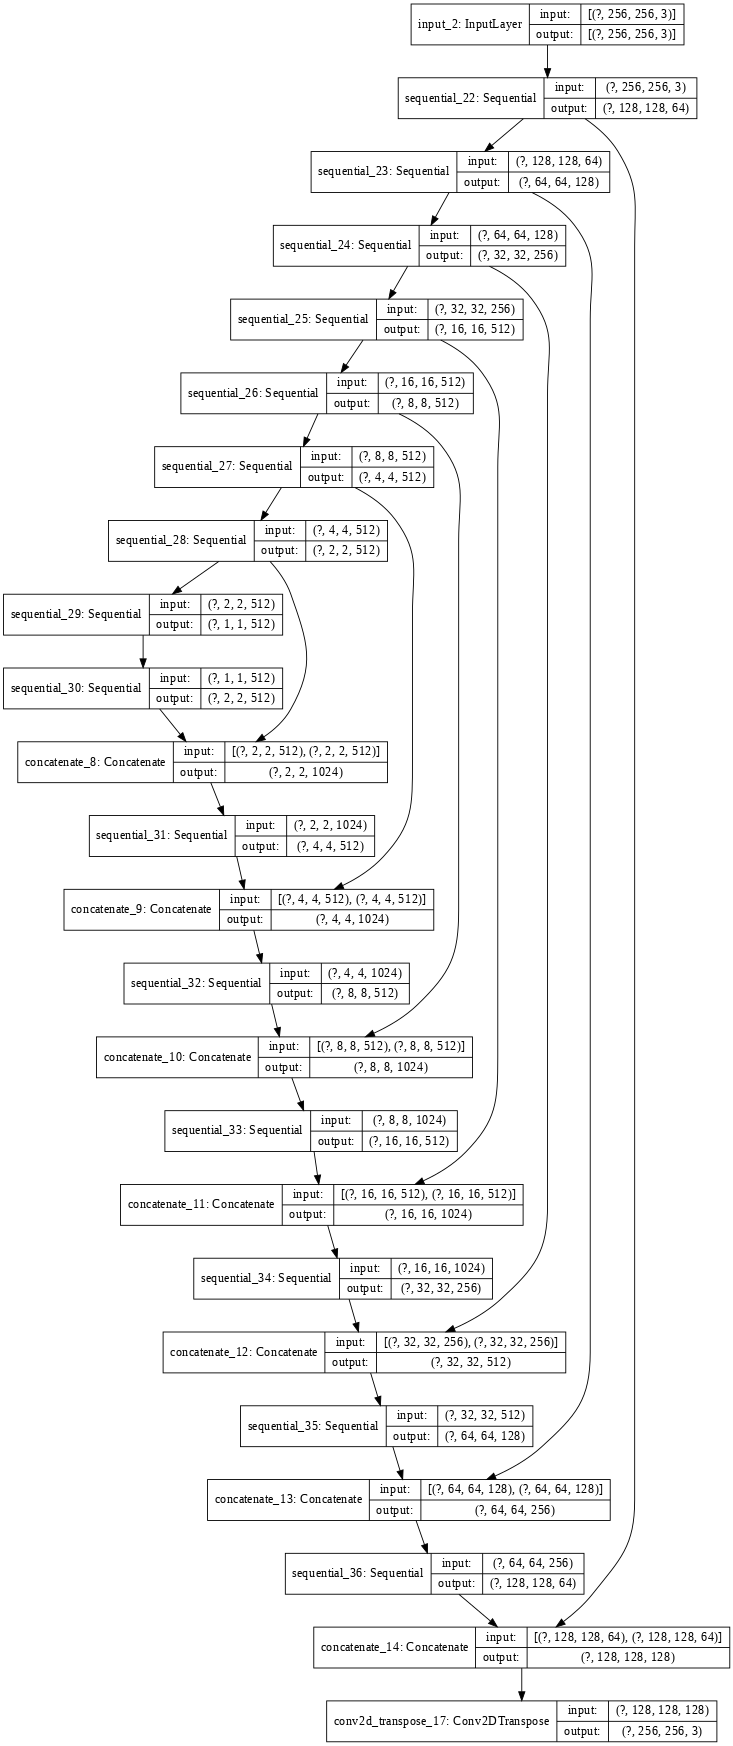

In [ ]:
 # probamos que crea el modelo y mostramos arquitectura
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


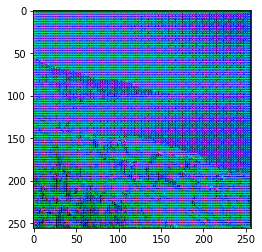

In [ ]:

gen_output = generator(((inp[tf.newaxis,...]+1)*255), training=False)
plt.imshow(gen_output[0]) # devuelve el lote => eliminamos primera dimensión resto igual
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


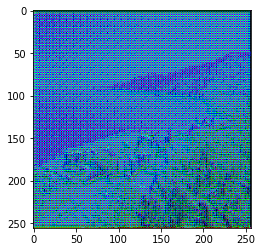

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


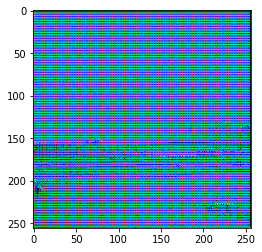

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


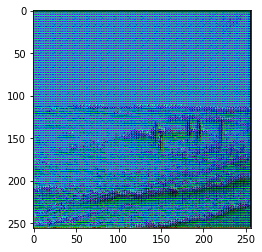

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


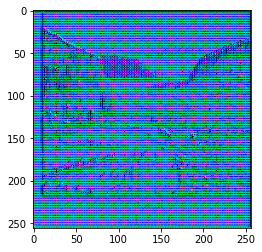

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


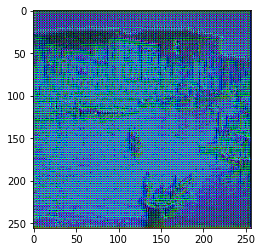

In [ ]:
# probamos que el modelo ejecuta

for inimg, tgimg in train_dataset.take(5):
  gen_output = generator(((inimg+1)*255) , training=False)
  plt.imshow(gen_output[0]) # devuelve el lote => eliminamos primera dimensión resto igual
  plt.show()




* **Generator loss**
* Es una pérdida de entropía cruzada sigmoidea de las imágenes generadas y una serie de imágenes.
* El documento también incluye la pérdida L1, que es MAE (error absoluto medio) entre la imagen generada y la imagen objetivo.
* Esto permite que la imagen generada se vuelva estructuralmente similar a la imagen de destino.
* La fórmula para calcular la pérdida total del generador = gan_loss + LAMBDA * l1_loss, donde LAMBDA = 100. Este valor fue decidido por los autores del artículo .
El procedimiento de entrenamiento para el generador se muestra a continuación:

In [ ]:
LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

![Generator Update Image](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/gen.png?raw=1)


## Discriminador

Se utiliza en vez de un discriminador que devuelve si la imagen es real o no, una red que devuelve si trozos de la imagen se pueden considerar reales.

Red convolucional Patchga


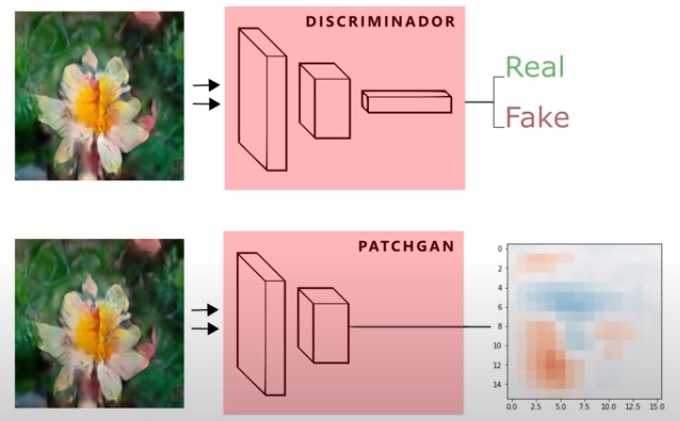

El discriminador es un PatchGAN.
  * Cada bloque en el discriminador es (Conv -> BatchNorm -> Leaky ReLU)
  * La forma de la salida después de la última capa es (batch_size, 30, 30, 1)
  * Cada parche de 30x30 de la salida clasifica una parte de 70x70 de la imagen de entrada (dicha arquitectura se llama PatchGAN).
  * El discriminador recibe 2 entradas.
    * Imagen de entrada y la imagen de destino, que debe clasificar como real.
    * Imagen de entrada y la imagen generada (salida del generador), que debe clasificar como falsa.
    * Concatenamos estas 2 entradas juntas en el código ( tf.concat([inp, tar], axis=-1) )
    

In [ ]:
def Discriminator():
  

  ini = layers.Input(shape=[256, 256, 3], name="input_img")
  gen = layers.Input(shape=[256, 256, 3], name="gen_img")

  con = layers.concatenate([ini,gen]) 

  down1 = downsample(64, apply_batchnorm=False)(con) # [bs, 128, 128, 64] el tamaño se reduce a la mitad strides=2 y la cuarta dimensión coincide con los filtros a aplicar
  down2 = downsample(128)(down1) # [bs, 64, 64, 128]
  down3 = downsample(256)(down2) # [bs, 32, 32, 256]
  
  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)

  initializer = tf.random_normal_initializer(0., 0.02)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return keras.Model(inputs=[ini,gen],outputs=last)



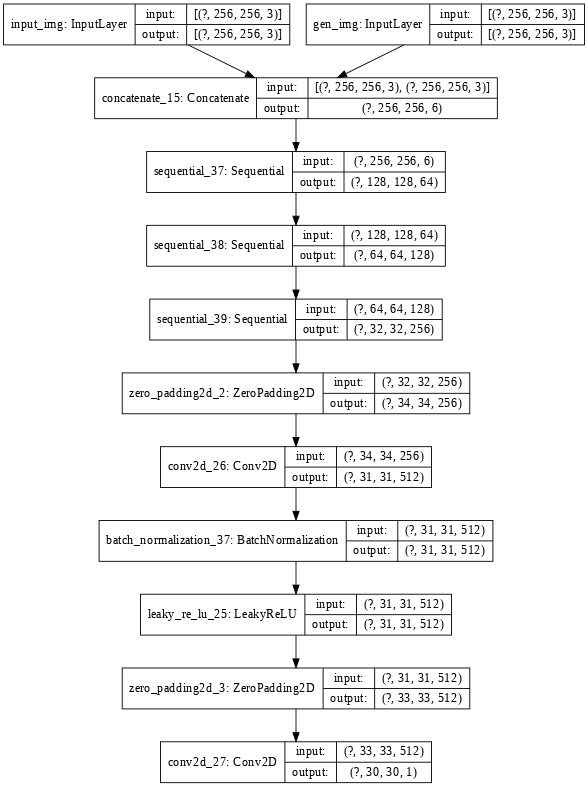

In [ ]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

(1, 30, 30, 1)


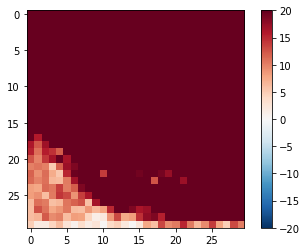

In [ ]:
gen_output = generator((inp[tf.newaxis,...]+1)*255, training=False)
disc_out = discriminator([(inp[tf.newaxis,...]+1)*255, gen_output], training=False)
plt.imshow(disc_out[0,...,-1], vmin=-20, vmax=20, cmap='RdBu_r')
print(disc_out.shape)
plt.colorbar()

**Discriminator loss**

* La función de pérdida del discriminador toma 2 entradas; imágenes reales, imágenes generadas
* real_loss es una pérdida de entropía cruzada sigmoidea de las imágenes reales y una matriz de unas (ya que estas son las imágenes reales)
* generate_loss es una pérdida de entropía cruzada sigmoidea de las imágenes generadas y una matriz de ceros (ya que estas son las imágenes falsas)
* Entonces la pérdida_total es la suma de la pérdida_real y la pérdida_generada

In [ ]:
loss_object = keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
  #Diferencia entre los true por ser real y el detectado por el discriminador
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  #Diferencia entre los true por ser real y el detectado por el discriminador
  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)  

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

El procedimiento de entrenamiento para el discriminador se muestra a continuación.

![Discriminator Update Image](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/dis.png?raw=1)


Definir los optimizadores

In [ ]:
generator_optimizer = keras.optimizers.Adam(2e-4, beta_1= 0.5)
discrimitator_optimizer = keras.optimizers.Adam(2e-4, beta_1= 0.5)

Puntos de control

In [ ]:
import os

checkpoint_prefix = os.path.join(CKPATH, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer
                                 ,discrimitator_optimizer=discrimitator_optimizer
                                 ,generator=generator
                                 ,discriminator=discriminator)



# EJECUCION Generar imágenes

Escribe una función para trazar algunas imágenes durante el entrenamiento.

  * Pasamos imágenes del conjunto de datos de prueba al generador.
  * El generador luego traducirá la imagen de entrada en la salida.
  * El último paso es trazar las predicciones y ¡listo!


In [ ]:
def generate_images(model, test_input, tar, save_filename=False, display_imgs=True):
  
  # El training=True es intencional aquí ya que queremos las estadísticas por 
  # lotes mientras ejecutamos el modelo en el conjunto de datos de prueba. 
  # Si usamos training = False, obtendremos las estadísticas acumuladas 
  # aprendidas del conjunto de datos de entrenamiento
  prediction = model(test_input, training=True)
  plt.figure(figsize=(10,10))
  
  if save_filename:
    tf.keras.preprocessing.image.save_img(OUTGENPATH + '/' + save_filename + '.jpg', prediction[0,...])

  if display_imgs:
    plt.figure(figsize=(10,10))
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      plt.imshow(display_list[i] * 0.5 + 0.5)
      plt.axis('off')

  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

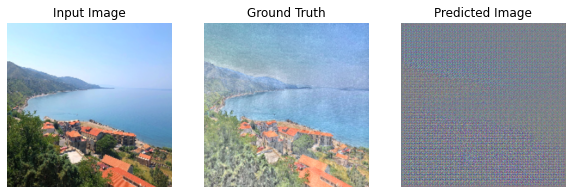

In [ ]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input[0,...], example_target[0,...])

## Training
* Para cada entrada de ejemplo, genere una salida.
* El discriminador recibe input_image y la imagen generada como la primera entrada. La segunda entrada es input_image y target_image.
* A continuación, calculamos la pérdida del generador y del discriminador.
* Luego, calculamos los gradientes de pérdida con respecto al generador y las variables discriminadoras (entradas) y las aplicamos al optimizador.
* Luego, registre las pérdidas en TensorBoard.

In [ ]:
@tf.function()
def train_step(input_image, target, epoch):

  with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape:
    output_image = generator(input_image, training=True)

    output_gen_discr = discriminator([output_image, input_image], training=True)
    output_trg_discr = discriminator([target, input_image], training=True)

    gen_loss, gen_gan_loss, gen_l1_loss  = generator_loss(output_gen_discr, output_image, target)
    discr_loss = discriminator_loss(output_trg_discr, output_gen_discr)
    
  # Calcular gradientes
  generator_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
  discriminator_grads = discr_tape.gradient(discr_loss, discriminator.trainable_variables)

  # Optimizar pesos de la red
  generator_optimizer.apply_gradients(zip(generator_grads,generator.trainable_variables))
  discrimitator_optimizer.apply_gradients(zip(discriminator_grads,discriminator.trainable_variables))
    
  with summary_writer.as_default():
    tf.summary.scalar('gen_loss', gen_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('discr_loss', discr_loss, step=epoch)


El ciclo de entrenamiento real:

* Itera sobre el número de épocas.
* En cada época borra la pantalla y ejecuta generate_images para mostrar su progreso.
* En cada época, itera sobre el conjunto de datos de entrenamiento, imprimiendo un '.' para cada ejemplo.
* Guarda un puesto de control cada 20 épocas.

In [ ]:
import time

from IPython.display import clear_output

def train(dataset, epochs, test_ds):
  for epoch in range(epochs):
    start = time.time()
    imgi = 0

    # Entrenamiento
    for input_image, target in dataset:
      if (imgi + 1) % 50 == 0:
        print('epoch ' + str(epoch) + ' - train: ' + str(imgi) + '/' + str(len(tr_urls)))
      imgi+=1
      train_step(input_image, target, epoch)

    clear_output(wait=True)  

    for example_input, example_target in test_ds.take(1):
      generate_images(generator, example_input[0,...], example_target[0,...], str(epoch), display_imgs=True)
      
    # salvar checkpoint
    if (epoch + 1) % 20 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))   

  checkpoint.save(file_prefix = checkpoint_prefix)   

Este ciclo de entrenamiento guarda registros que puedes ver fácilmente en TensorBoard para monitorear el progreso del entrenamiento. Trabajando localmente, lanzaría un proceso de tensorboard separado. En una computadora portátil, si desea monitorear con TensorBoard, es más fácil iniciar el visor antes de comenzar el entrenamiento.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

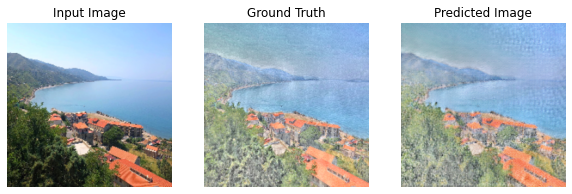

Time taken for epoch 150 is 71.085275888443 sec



In [ ]:
import datetime

EPOCHS = 150 # Luego 150

summary_writer = tf.summary.create_file_writer(
  LOGPATH + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

train(train_dataset, EPOCHS, test_dataset)

Guardar modelo completo

In [ ]:
generator.save(MODELPATH +'/MonetPix2Pix_Generator_20201118') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/DatosAux/model/MonetPix2Pix_Generator_20201118/assets


In [ ]:
generator_MonetPix2Pix = tf.keras.models.load_model(MODELPATH +'/MonetPix2Pix_Generator_20201118')

In [ ]:
Restaurar el último punto de control y prueba

In [ ]:
# Restaurar checkpoint
# /content/drive/My Drive/DatosAux/checkpoints/ckpt-5
checkpoint.restore(tf.train.latest_checkpoint(CKPATH)).assert_consumed()

Generar imagenes del conjunto de test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

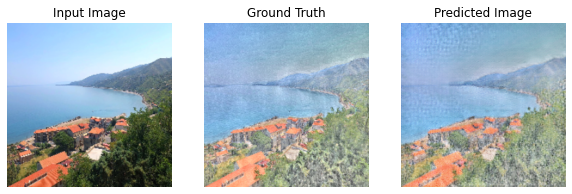

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

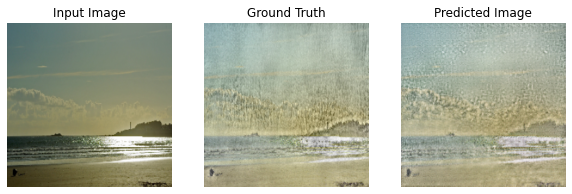

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

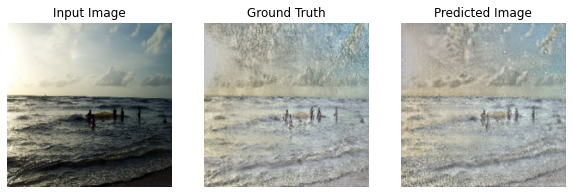

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

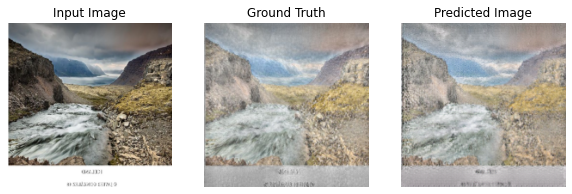

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

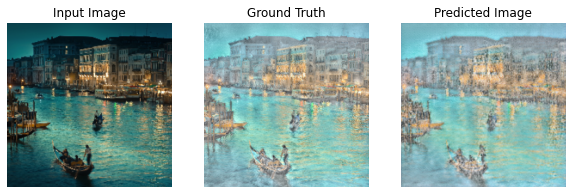

In [ ]:
for example_input, example_target in test_dataset.take(5):
  generate_images(generator_MonetPix2Pix, example_input[0,...], example_target[0,...])